In [423]:
import random as r
import pandas as pd
import numpy as np


n_samples = 10000


chars = '1234567890abcdefghijk'
user_id_len = 15
user_ids = set()
while len(user_ids) < n_samples:
    s = ''.join(r.choices(chars, k=user_id_len))
    user_ids.add(s)


max_order_num = 9
order_nums = []
for _ in range(1, n_samples + 1):
    order_nums.append(r.randint(1, max_order_num))


mean = 1440
std = 200
delivery_times = np.round(np.random.normal(mean, std, n_samples), 10)



lambda_ = 1
shift = 1
total_sums = np.round(np.random.exponential(lambda_, n_samples) + shift, 3)


retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention_numbers = [1, 2, 3, 4, 5]
retentions = np.random.choice(retention_numbers, n_samples, p=retention_probabilities)


data = pd.DataFrame({
    'user_id': list(user_ids),
    'order_num': order_nums,
    'delivery_time': delivery_times,
    'total_sum': total_sums,
    'retention': retentions
    })

data

,user_id,order_num,delivery_time,total_sum,retention
0,7eb8bc6460bgad9,1,1629.331108,3.542,1
1,74k99i5f7ccfhg1,2,1286.281368,1.418,1
2,kj5gak0kf60ggik,8,1618.524633,2.834,1
3,925h5cgjjjcif46,4,1333.643611,1.526,2
4,6dk481j36dcb7f1,2,1472.608047,2.572,4
...,...,...,...,...,...
9995,ad74khhiccdg319,2,1471.383853,1.112,1
9996,kke3e05eih9fj6i,7,1254.016871,2.789,2
9997,87hkd4gi2ge48f0,9,1535.433203,1.015,2
9998,cibec32h74gh8bh,3,1488.070691,1.060,3


In [424]:
mean_delivery_time_data = pd.DataFrame({'mean_delivery_time': np.round(data.groupby('order_num')['delivery_time'].mean())})
merged_data = pd.merge(data, mean_delivery_time_data, on='order_num')
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time
0,7eb8bc6460bgad9,1,1629.331108,3.542,1,1445.0
1,74k99i5f7ccfhg1,2,1286.281368,1.418,1,1452.0
2,kj5gak0kf60ggik,8,1618.524633,2.834,1,1441.0
3,925h5cgjjjcif46,4,1333.643611,1.526,2,1446.0
4,6dk481j36dcb7f1,2,1472.608047,2.572,4,1452.0
...,...,...,...,...,...,...
9995,ad74khhiccdg319,2,1471.383853,1.112,1,1452.0
9996,kke3e05eih9fj6i,7,1254.016871,2.789,2,1435.0
9997,87hkd4gi2ge48f0,9,1535.433203,1.015,2,1434.0
9998,cibec32h74gh8bh,3,1488.070691,1.060,3,1440.0


In [425]:
n_in_every_segment = 3
num_segments = (max_order_num + n_in_every_segment - 1) // n_in_every_segment
bins = [i * n_in_every_segment for i in range(num_segments + 1)]
labels = [f'{i * n_in_every_segment + 1}-{(i + 1) * n_in_every_segment}' for i in range(num_segments)]

merged_data['segment'] = pd.cut(merged_data['order_num'], bins=bins, labels=labels)
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,7eb8bc6460bgad9,1,1629.331108,3.542,1,1445.0,1-3
1,74k99i5f7ccfhg1,2,1286.281368,1.418,1,1452.0,1-3
2,kj5gak0kf60ggik,8,1618.524633,2.834,1,1441.0,7-9
3,925h5cgjjjcif46,4,1333.643611,1.526,2,1446.0,4-6
4,6dk481j36dcb7f1,2,1472.608047,2.572,4,1452.0,1-3
...,...,...,...,...,...,...,...
9995,ad74khhiccdg319,2,1471.383853,1.112,1,1452.0,1-3
9996,kke3e05eih9fj6i,7,1254.016871,2.789,2,1435.0,7-9
9997,87hkd4gi2ge48f0,9,1535.433203,1.015,2,1434.0,7-9
9998,cibec32h74gh8bh,3,1488.070691,1.060,3,1440.0,1-3


In [426]:
total_sum_desc = pd.DataFrame(merged_data['total_sum'].describe()).T
total_sum_desc

,count,mean,std,min,25%,50%,75%,max
total_sum,10000.0,2.003935,0.986507,1.0,1.298,1.7015,2.4,10.133


In [427]:
most_frequent_total_sum = merged_data['total_sum'].value_counts()


print(f'Медиана: {total_sum_desc["50%"].values[0]}')
print(f'Мода: {most_frequent_total_sum.index[0]}; встречается {most_frequent_total_sum.iloc[0]} раз')
print(f'Среднее: {total_sum_desc["mean"].values[0]}')
print(f'Дисперсия: {np.var(merged_data["total_sum"])}')
print(f'Стандартное отклонение: {total_sum_desc["std"].values[0]}')

Медиана: 1.7015
Мода: 1.17; встречается 17 раз
Среднее: 2.0039351
Дисперсия: 0.9730980562879901
Стандартное отклонение: 0.9865066527021359


In [428]:
import matplotlib.pyplot as plt
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,7eb8bc6460bgad9,1,1629.331108,3.542,1,1445.0,1-3
1,74k99i5f7ccfhg1,2,1286.281368,1.418,1,1452.0,1-3
2,kj5gak0kf60ggik,8,1618.524633,2.834,1,1441.0,7-9
3,925h5cgjjjcif46,4,1333.643611,1.526,2,1446.0,4-6
4,6dk481j36dcb7f1,2,1472.608047,2.572,4,1452.0,1-3
...,...,...,...,...,...,...,...
9995,ad74khhiccdg319,2,1471.383853,1.112,1,1452.0,1-3
9996,kke3e05eih9fj6i,7,1254.016871,2.789,2,1435.0,7-9
9997,87hkd4gi2ge48f0,9,1535.433203,1.015,2,1434.0,7-9
9998,cibec32h74gh8bh,3,1488.070691,1.060,3,1440.0,1-3


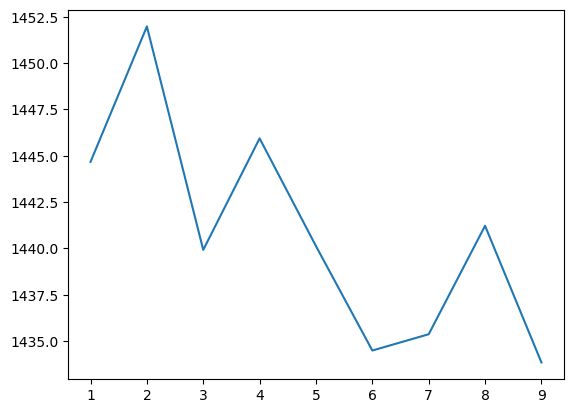

In [429]:
plt.plot(merged_data.groupby('order_num')['delivery_time'].mean())

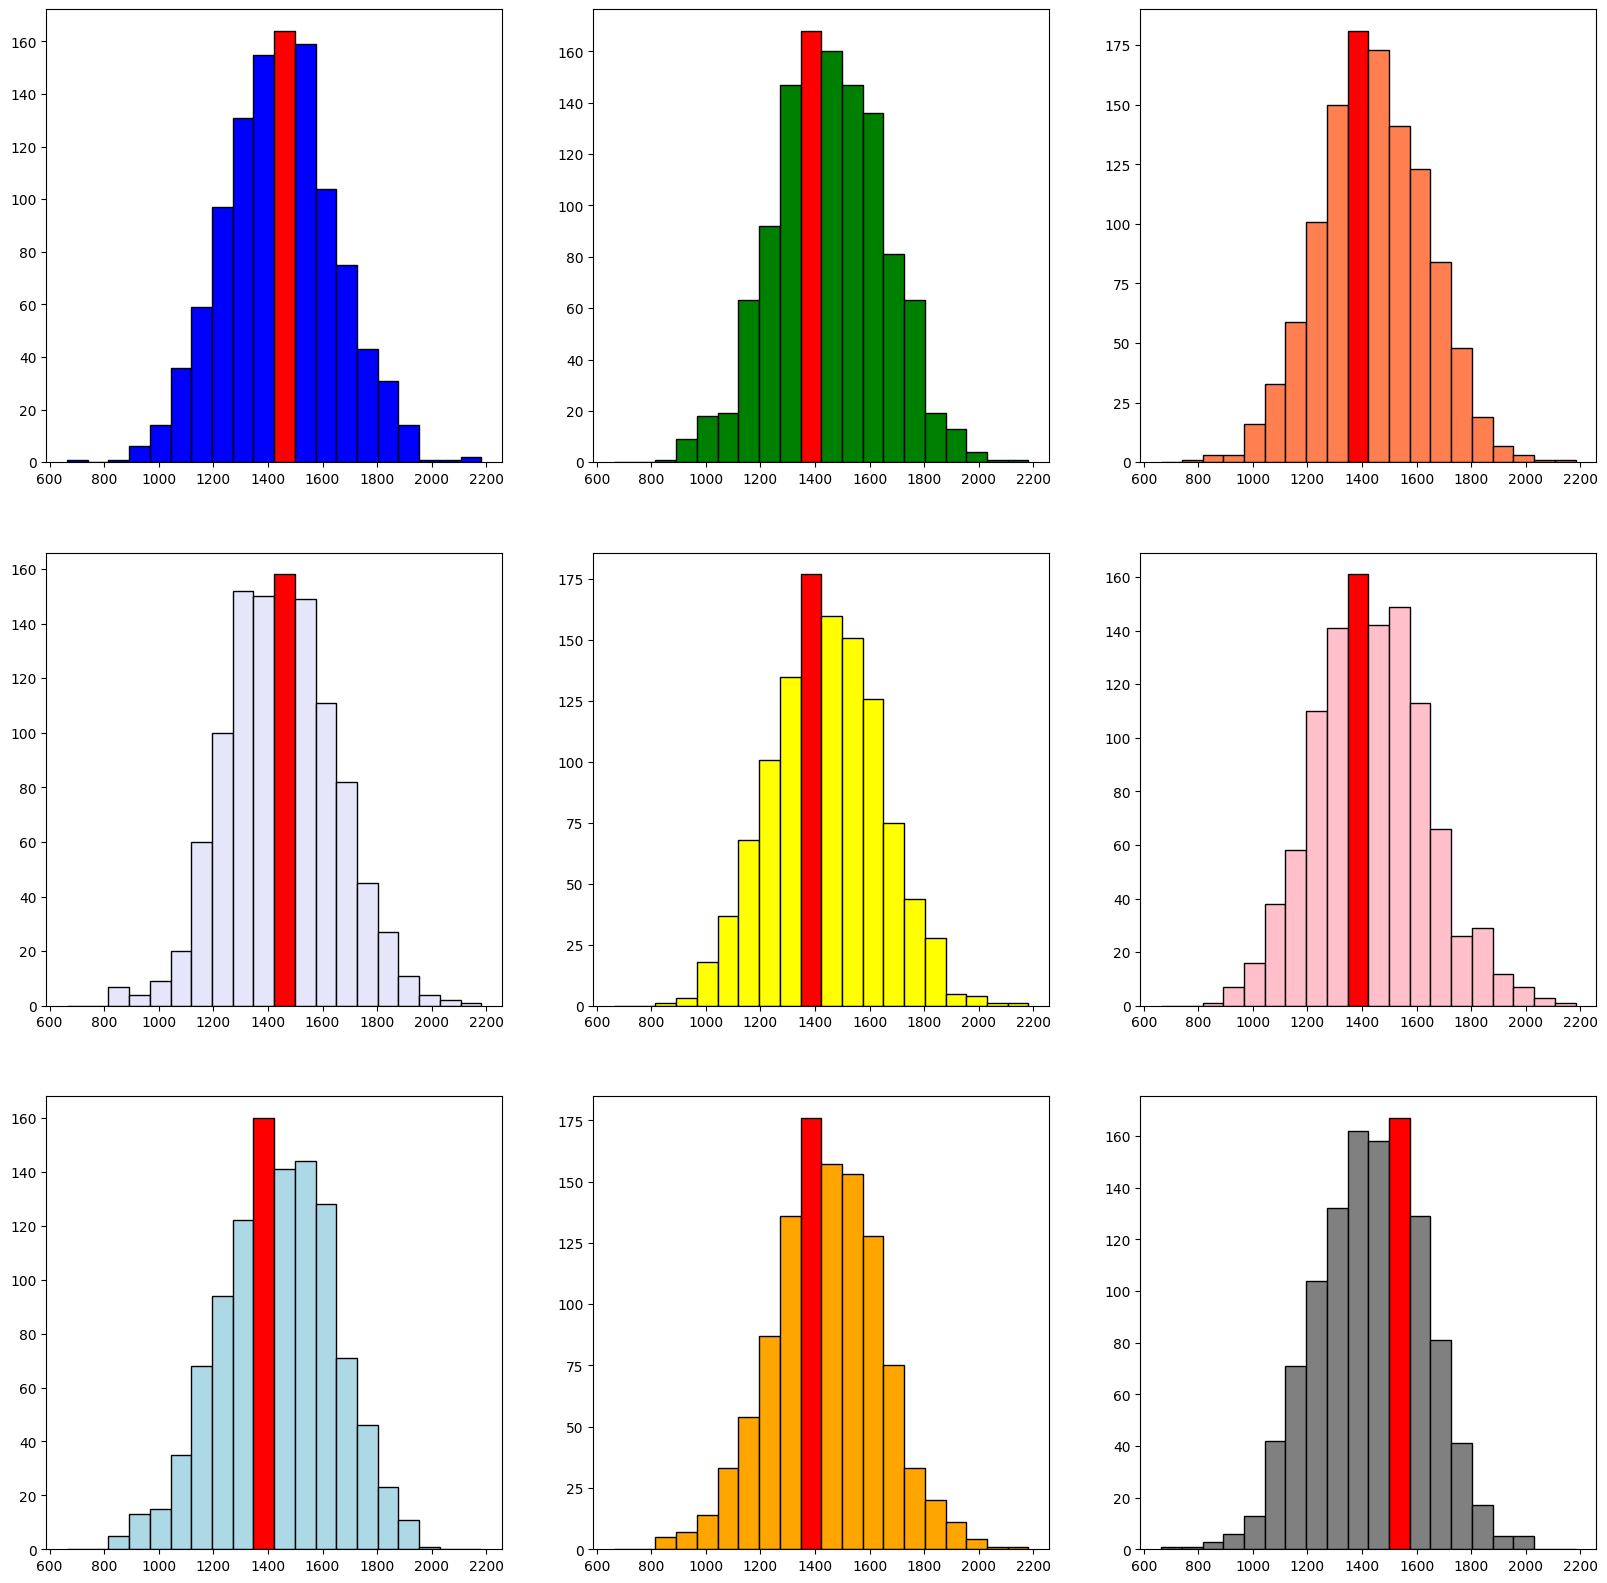

In [430]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
assert len(axs) * len(axs[0]) == max_order_num
curr_order_num = 0
bins = 20
colors = [
    "blue",
    "green",
    "coral",
    "lavender",
    "yellow",
    "pink",
    "lightblue",
    "orange",
    "gray"
]
for i in range(len(axs)):
    for j in range(len(axs[0])):
        curr_order_num += 1
        counts, bins, patches = axs[i, j].hist(merged_data[merged_data['order_num'] == curr_order_num]['delivery_time'], 
                       bins=bins, 
                       color=colors[curr_order_num - 1],
                       edgecolor='black'
                       )
        max_index = np.argmax(counts)
        patches[max_index].set_facecolor('red')
        #axs[i, j].title(f'Номер заказа {curr_order_num}')

In [431]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans

/var/folders/jd/kkmnjfgd3zjfxt0jb2p4gdy40000gn/T/ipykernel_4971/549127619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_data['total_sum'] = x_scaler.fit_transform(clustered_data[['total_sum']])
/var/folders/jd/kkmnjfgd3zjfxt0jb2p4gdy40000gn/T/ipykernel_4971/549127619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_data['delivery_time'] = x_scaler.fit_transform(clustered_data[['delivery_time']])


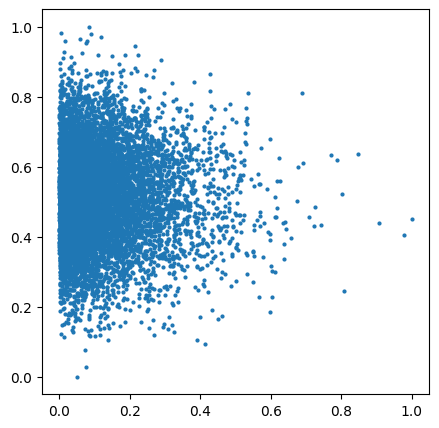

In [432]:
plt.figure(figsize=(5, 5))
clustered_data = merged_data[['total_sum', 'delivery_time']]

x_scaler = MinMaxScaler()
clustered_data['total_sum'] = x_scaler.fit_transform(clustered_data[['total_sum']])
clustered_data['delivery_time'] = x_scaler.fit_transform(clustered_data[['delivery_time']])
plt.plot(clustered_data['total_sum'], clustered_data['delivery_time'], 'o', markersize=2)

In [433]:
### валидировать кластеризацию будем методом локтя, используя внутрикластерное расстояние
sums_inertia = {}
cluster_range = range(2, 20)
for i in cluster_range:
    clusters = KMeans(n_clusters=i).fit(clustered_data)
    sums_inertia[clusters.inertia_] = clusters
sums_inertia_keys = list(sums_inertia.keys())

In [434]:
from kneed import KneeLocator

Оптимальное количество кластеров: 8


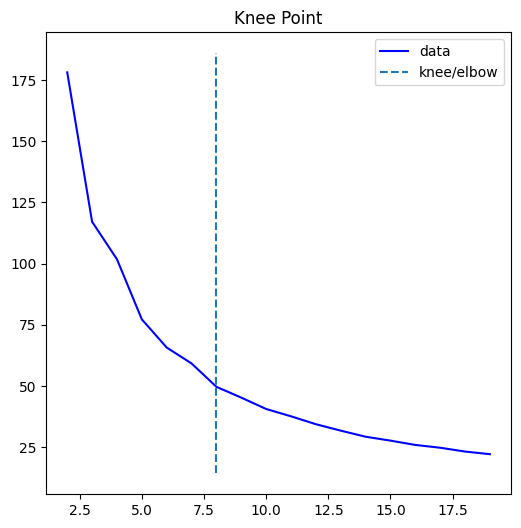

In [435]:
kneedle = KneeLocator(cluster_range, sums_inertia_keys, curve='convex', direction='decreasing')
kneedle.plot_knee()
print(f'Оптимальное количество кластеров: {kneedle.elbow}')

<Axes: xlabel='total_sum', ylabel='delivery_time'>

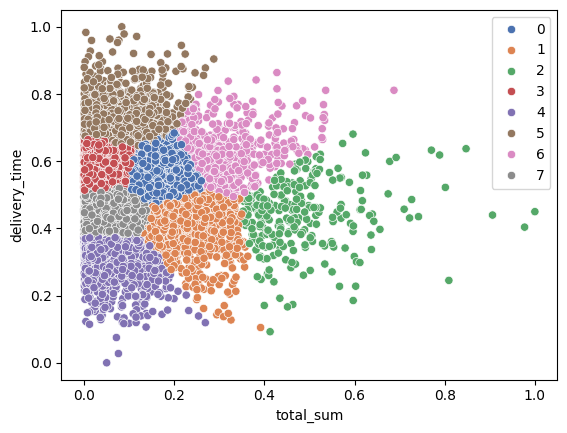

In [436]:
labels = sums_inertia[sums_inertia_keys[kneedle.elbow - 2]].labels_
sns.scatterplot(x=clustered_data['total_sum'], y=clustered_data['delivery_time'], hue=labels, palette='deep')

In [437]:
merged_data['labels'] = labels
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment,labels
0,7eb8bc6460bgad9,1,1629.331108,3.542,1,1445.0,1-3,6
1,74k99i5f7ccfhg1,2,1286.281368,1.418,1,1452.0,1-3,7
2,kj5gak0kf60ggik,8,1618.524633,2.834,1,1441.0,7-9,0
3,925h5cgjjjcif46,4,1333.643611,1.526,2,1446.0,4-6,7
4,6dk481j36dcb7f1,2,1472.608047,2.572,4,1452.0,1-3,0
...,...,...,...,...,...,...,...,...
9995,ad74khhiccdg319,2,1471.383853,1.112,1,1452.0,1-3,3
9996,kke3e05eih9fj6i,7,1254.016871,2.789,2,1435.0,7-9,1
9997,87hkd4gi2ge48f0,9,1535.433203,1.015,2,1434.0,7-9,3
9998,cibec32h74gh8bh,3,1488.070691,1.060,3,1440.0,1-3,3


In [438]:
### A/B анализ
### буду сравнивать 4 и 5 кластеры (4 - маленькая сумма заказа и быстрая доставка; 5 - маленькая сумма заказа и долгая доставка)

